<a href="https://colab.research.google.com/github/rht6226/DL/blob/main/Uci_dataset_LSTM_based_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Preprocessed data

In [ ]:
import numpy as np
from keras.utils import to_categorical
import json
import matplotlib

In [2]:
class UciMobileDataset:
    def __init__(self, filepath):
        with np.load(filepath + 'uci.npz') as data:
            self.trainX = data['trainX']
            self.trainy = to_categorical(data['trainy'])
            self.testX = data['testX']
            self.testy = to_categorical(data['testy'])

    def summary(self):
        print("UCI Human Activity Recognition Dataset: ")
        print("Shape of training data = X:{}, y: {}".format(self.trainX.shape, self.trainy.shape))
        print("Shape of testing data = X:{}, y: {}".format(self.testX.shape, self.testy.shape))

In [4]:
uci = UciMobileDataset(filepath='/content/drive/My Drive/HAR Processed Data/UCI_HAR/')
uci.summary()

UCI Human Activity Recognition Dataset: 
Shape of training data = X:(7352, 128, 9), y: (7352, 6)
Shape of testing data = X:(2947, 128, 9), y: (2947, 6)


# LSTM Based Model



## Model training

In [13]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils.vis_utils import plot_model

In [14]:
input_shape, n_outputs = (uci.trainX.shape[1], uci.trainX.shape[2]) , uci.trainy.shape[1]

In [15]:
def get_lstm_model(input_shape, n_outputs):
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
model_lstm = get_lstm_model(input_shape=input_shape, n_outputs=n_outputs)
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               44000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 606       
Total params: 54,706
Trainable params: 54,706
Non-trainable params: 0
_________________________________________________________________


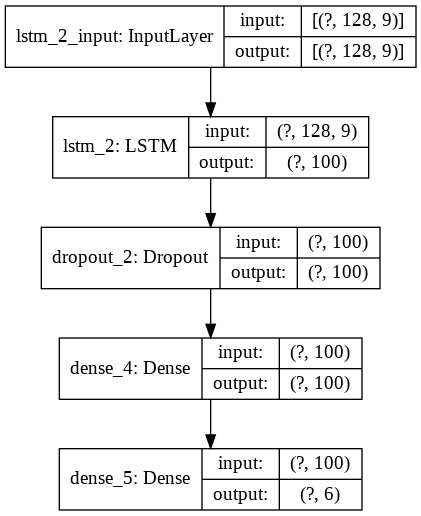

In [20]:
plot_model(model_lstm, show_shapes=True, show_layer_names=True)

In [22]:
verbose, epochs, batch_size = 1, 15, 64
history_lstm = model_lstm.fit(uci.trainX, uci.trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(uci.testX, uci.testy))

Epoch 1/15
115/115 [==============================] - 19s 166ms/step - loss: 1.2935 - accuracy: 0.4421 - val_loss: 1.1604 - val_accuracy: 0.5093
Epoch 2/15
115/115 [==============================] - 15s 134ms/step - loss: 0.8871 - accuracy: 0.5937 - val_loss: 0.8103 - val_accuracy: 0.6627
Epoch 3/15
115/115 [==============================] - 15s 131ms/step - loss: 0.7208 - accuracy: 0.6683 - val_loss: 0.6841 - val_accuracy: 0.7479
Epoch 4/15
115/115 [==============================] - 15s 130ms/step - loss: 0.5882 - accuracy: 0.7564 - val_loss: 0.6972 - val_accuracy: 0.7516
Epoch 5/15
115/115 [==============================] - 15s 130ms/step - loss: 0.4658 - accuracy: 0.8308 - val_loss: 0.5139 - val_accuracy: 0.8493
Epoch 6/15
115/115 [==============================] - 15s 131ms/step - loss: 0.3454 - accuracy: 0.8813 - val_loss: 0.4068 - val_accuracy: 0.8758
Epoch 7/15
115/115 [==============================] - 15s 130ms/step - loss: 0.2303 - accuracy: 0.9226 - val_loss: 0.3110 - val_ac

In [64]:
model_lstm.save('/content/drive/My Drive/Colab Notebooks/Models/LSTM_UCIHAR.h5')

In [65]:
_, accuracy = model_lstm.evaluate(uci.testX, uci.testy, batch_size=batch_size, verbose=1)
print(accuracy)

47/47 [==============================] - 2s 41ms/step - loss: 0.2776 - accuracy: 0.9046
0.9046487808227539


## Plotting Accuracy

In [26]:
# Plotting Loss and Accuracy

import matplotlib.pyplot as plt

def plot_model_accuracy(details, history, figureSize=[8, 8]):
    matplotlib.rcParams['figure.figsize'] = figureSize
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy for {}'.format(details))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plot_model_loss(details, history, figureSize=[8, 8]):
    matplotlib.rcParams['figure.figsize'] = figureSize
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss for {}'.format(details))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

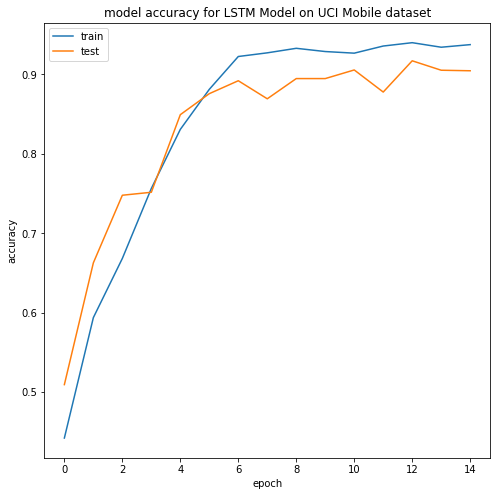

In [28]:
plot_model_accuracy("LSTM Model on UCI Mobile dataset", history=history_lstm)

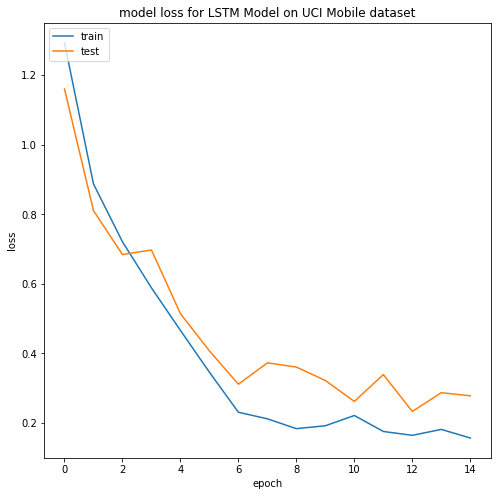

In [29]:
plot_model_loss("LSTM Model on UCI Mobile dataset", history=history_lstm)

## Plotting Confusion Matrix

In [31]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [32]:
def plot_cm(predictedY, testy, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues, figureSize=[10, 10]):
    matplotlib.rcParams['figure.figsize'] = figureSize
    # Predict Y, And get Confusion Matrix
    predictedY = np.argmax(predictedY, axis = 1)
    testy = np.argmax(testy, axis=1)
    cm = confusion_matrix(y_true=testy, y_pred=predictedY)

    # Plotting
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


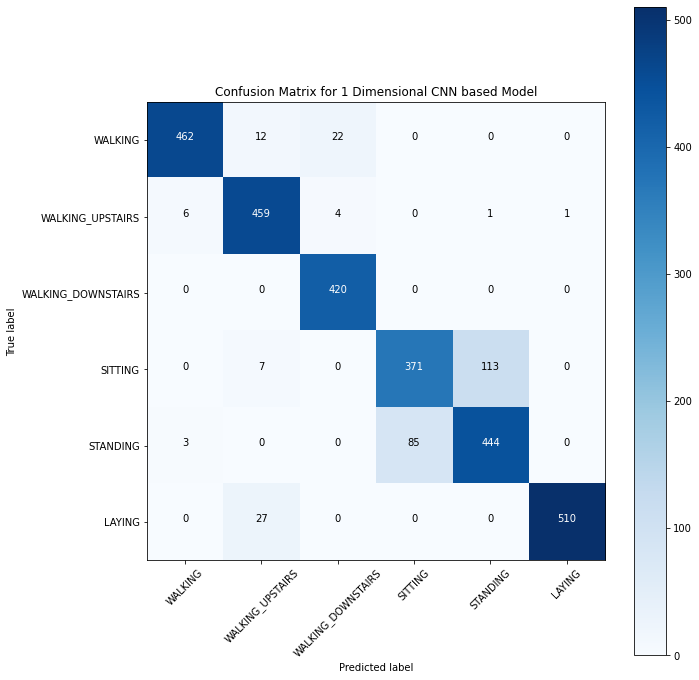

In [33]:
predictedY = model_lstm.predict(uci.testX)
cm_plot_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
plot_cm(predictedY, testy=uci.testy, classes=cm_plot_labels, title='Confusion Matrix for 1 Dimensional CNN based Model')

## Classification Report

In [34]:
from sklearn.metrics import classification_report

In [74]:
predictedY = model_lstm.predict(uci.testX)
y_pred = np.argmax(predictedY, axis = 1)
y_true = np.argmax(uci.testy, axis=1)
target_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
print("LSTM Based Model:\n")
print(classification_report(y_true, y_pred, target_names=target_names))

LSTM Based Model:

                    precision    recall  f1-score   support

           WALKING       0.98      0.93      0.96       496
  WALKING_UPSTAIRS       0.91      0.97      0.94       471
WALKING_DOWNSTAIRS       0.94      1.00      0.97       420
           SITTING       0.81      0.76      0.78       491
          STANDING       0.80      0.83      0.81       532
            LAYING       1.00      0.95      0.97       537

          accuracy                           0.90      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.90      0.90      2947



## Overall accuracy using Weighted F-Beta Score

In [94]:
from sklearn.metrics import precision_recall_fscore_support as score

In [103]:
predictedY = model_lstm.predict(uci.testX)
y_pred = np.argmax(predictedY, axis = 1)
y_true = np.argmax(uci.testy, axis=1)

precision,recall,fscore, _ = score(y_true,y_pred,average='macro')
print ('Precision : {}'.format(precision))
print ('Recall    : {}'.format(recall))
print ('F-score   : {}'.format(fscore))


Precision : 0.9064741859175997
Recall    : 0.9076469761862137
F-score   : 0.9062619199577867


# CNN-LSTM Based Model

## Model training

The CNN LSTM model will read subsequences of the main sequence in as blocks, extract features from each block, then allow the LSTM to interpret the features extracted from each block.

One approach to implementing this model is to split each window of 128 time steps into subsequences for the CNN model to process. For example, the 128 time steps in each window can be split into four subsequences of 32 time steps.

In [53]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten
from keras.utils.vis_utils import plot_model

In [54]:
# Split the dataset from timesteps of 128 to 4 subsequences of size 32 each
n_steps, n_length = 4, 32
n_features, n_outputs = uci.trainX.shape[2] , uci.trainy.shape[1]
trainX = uci.trainX.reshape((uci.trainX.shape[0], n_steps, n_length, n_features))
testX = uci.testX.reshape((uci.testX.shape[0], n_steps, n_length, n_features))

In [55]:
print("Reshaped the trainX data from {} to : {}".format(uci.trainX.shape, trainX.shape))
print("Reshaped the testX data from {} to : {}".format(uci.testX.shape, testX.shape))

Reshaped the trainX data from (7352, 128, 9) to : (7352, 4, 32, 9)
Reshaped the testX data from (2947, 128, 9) to : (2947, 4, 32, 9)


The entire CNN model can be wrapped in a TimeDistributed layer to allow the same CNN model to read in each of the four subsequences in the window. The extracted features are then flattened and provided to the LSTM model to read, extracting its own features before a final mapping to an activity is made.

In [56]:
def get_cnn_lstm_model(n_length, n_features, n_outputs):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(100))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [58]:
model_cnn_lstm = get_cnn_lstm_model(n_length, n_features, n_outputs)
model_cnn_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_12 (TimeDis (None, None, 30, 64)      1792      
_________________________________________________________________
time_distributed_13 (TimeDis (None, None, 28, 64)      12352     
_________________________________________________________________
time_distributed_14 (TimeDis (None, None, 28, 64)      0         
_________________________________________________________________
time_distributed_15 (TimeDis (None, None, 14, 64)      0         
_________________________________________________________________
time_distributed_16 (TimeDis (None, None, 896)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               398800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)              

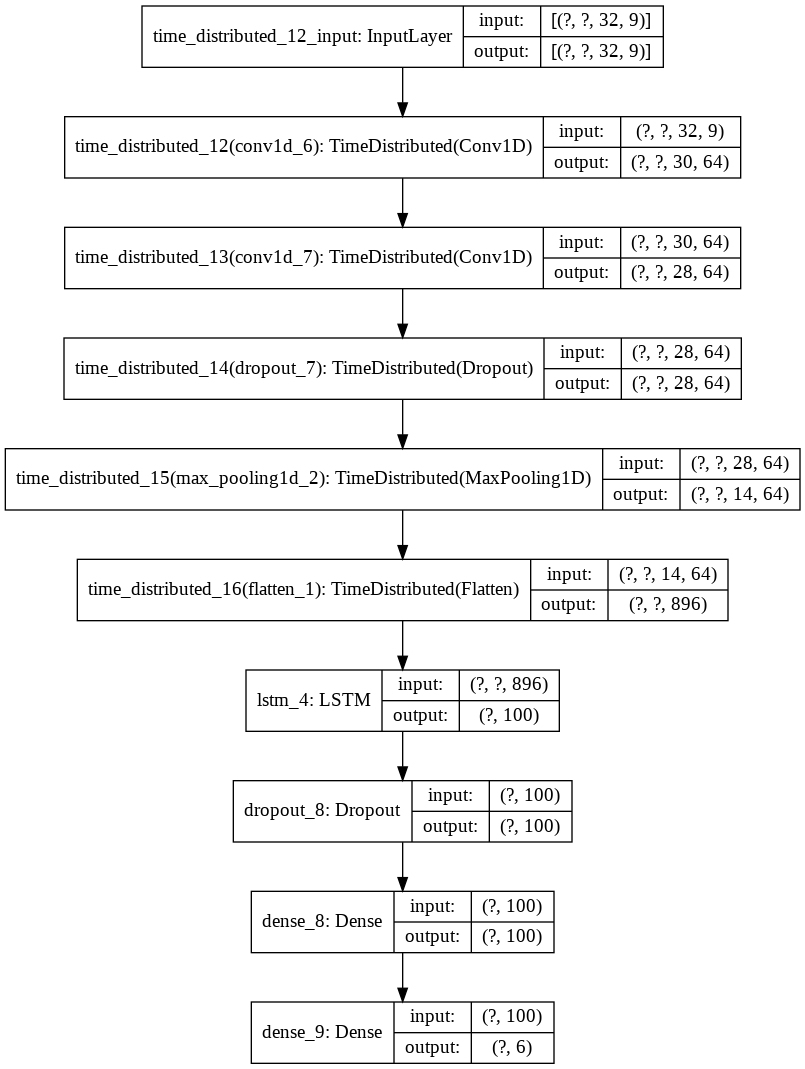

In [59]:
plot_model(model=model_cnn_lstm, show_layer_names=True, show_shapes=True)

In [61]:
verbose, epochs, batch_size = 1, 25, 64
history_cnn_lstm = model_cnn_lstm.fit(trainX, uci.trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(testX, uci.testy))

Epoch 1/25
115/115 [==============================] - 7s 65ms/step - loss: 0.6427 - accuracy: 0.7394 - val_loss: 0.4805 - val_accuracy: 0.8181
Epoch 2/25
115/115 [==============================] - 7s 60ms/step - loss: 0.2162 - accuracy: 0.9206 - val_loss: 0.4590 - val_accuracy: 0.8358
Epoch 3/25
115/115 [==============================] - 7s 59ms/step - loss: 0.1471 - accuracy: 0.9440 - val_loss: 0.3201 - val_accuracy: 0.8812
Epoch 4/25
115/115 [==============================] - 7s 60ms/step - loss: 0.1298 - accuracy: 0.9472 - val_loss: 0.4078 - val_accuracy: 0.8633
Epoch 5/25
115/115 [==============================] - 7s 60ms/step - loss: 0.1213 - accuracy: 0.9508 - val_loss: 0.2849 - val_accuracy: 0.9084
Epoch 6/25
115/115 [==============================] - 7s 59ms/step - loss: 0.1140 - accuracy: 0.9525 - val_loss: 0.3003 - val_accuracy: 0.9036
Epoch 7/25
115/115 [==============================] - 7s 60ms/step - loss: 0.1164 - accuracy: 0.9512 - val_loss: 0.3367 - val_accuracy: 0.9002

In [67]:
model_cnn_lstm.save('/content/drive/My Drive/Colab Notebooks/Models/CNN_LSTM_UCIHAR.h5')

In [68]:
_, accuracy = model_lstm.evaluate(uci.testX, uci.testy, batch_size=batch_size, verbose=1)
print(accuracy)

47/47 [==============================] - 2s 40ms/step - loss: 0.2776 - accuracy: 0.9046
0.9046487808227539


## Plotting Accuracy

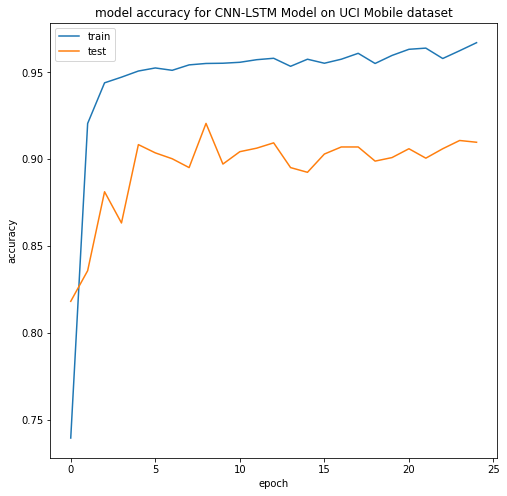

In [62]:
plot_model_accuracy("CNN-LSTM Model on UCI Mobile dataset", history=history_cnn_lstm)

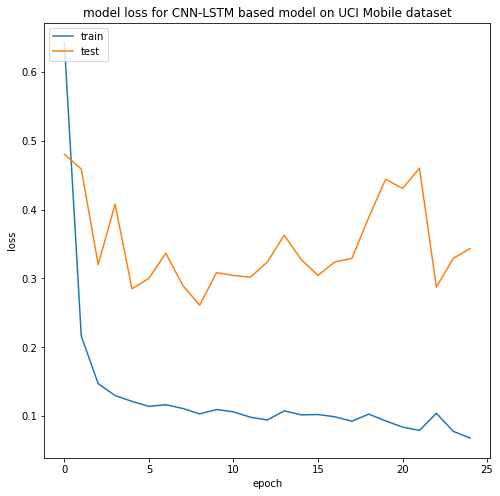

In [63]:
plot_model_loss("CNN-LSTM based model on UCI Mobile dataset", history=history_cnn_lstm)

## Plotting Confusion Matrix

Confusion matrix, without normalization


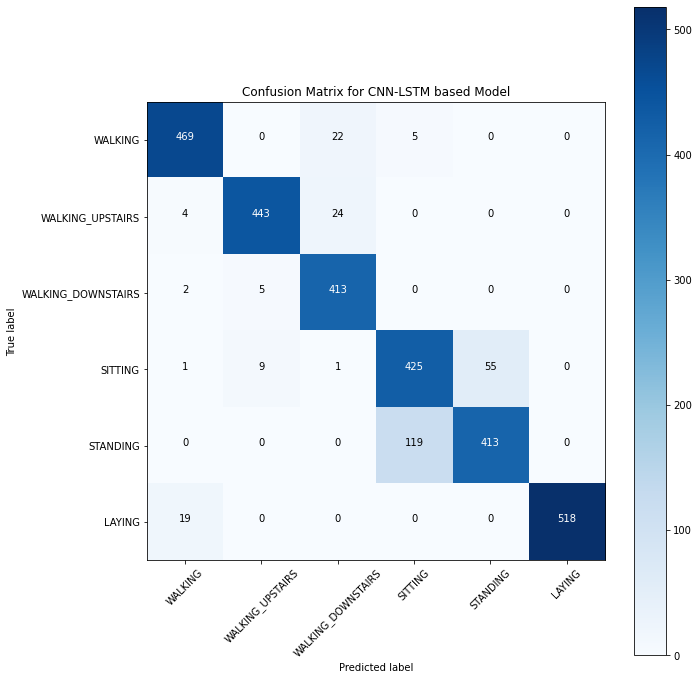

In [69]:
# CNN Based Network
predictedY = model_cnn_lstm.predict(testX)
cm_plot_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
plot_cm(predictedY, testy=uci.testy, classes=cm_plot_labels, title='Confusion Matrix for CNN-LSTM based Model')

## Classification Report

In [73]:
predictedY = model_cnn_lstm.predict(testX)
y_pred = np.argmax(predictedY, axis = 1)
y_true = np.argmax(uci.testy, axis=1)
target_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
print("CNN-LSTM Based Model:\n")
print(classification_report(y_true, y_pred, target_names=target_names))

CNN-LSTM Based Model:

                    precision    recall  f1-score   support

           WALKING       0.95      0.95      0.95       496
  WALKING_UPSTAIRS       0.97      0.94      0.95       471
WALKING_DOWNSTAIRS       0.90      0.98      0.94       420
           SITTING       0.77      0.87      0.82       491
          STANDING       0.88      0.78      0.83       532
            LAYING       1.00      0.96      0.98       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



## Overall accuracy using Weighted F-Beta Score

In [102]:
predictedY = model_cnn_lstm.predict(testX)
y_pred = np.argmax(predictedY, axis = 1)
y_true = np.argmax(uci.testy, axis=1)
precision,recall,fscore, _ = score(y_true,y_pred,average='macro')
print ('Precision : {}'.format(precision))
print ('Recall    : {}'.format(recall))
print ('F-score   : {}'.format(fscore))

Precision : 0.9118799473556628
Recall    : 0.9126607255868019
F-score   : 0.9108657707655873
